In [1]:
#pip install lz4 to load compressed lz4 data
#pip install somuclu for som implementation

In [5]:
#load the data 
import joblib
import pandas as pd
import numpy as np

X_tr=joblib.load('X_tr.joblib')
y_tr=joblib.load("y_tr.joblib")
original_data=pd.read_csv("afr_unique.csv")

#print(X_tr.shape,y_tr.shape,original_data.shape)
X_tr=pd.DataFrame(X_tr)
y_tr=pd.DataFrame(y_tr)


new=pd.concat([X_tr,y_tr,original_data],axis=1)
print(new.shape)

(362168, 612)


In [6]:
#sampling data points for som
new_df=new.sample(frac=0.0005, replace=False, random_state=1)
X_tr=new_df.iloc[:,:600]
y_tr=new_df.iloc[:,600]
original_data=new_df.iloc[:,601:]
print(X_tr.shape,y_tr.shape,original_data.shape)
print(original_data.head())
X_tr=X_tr.to_numpy()
print(type(X_tr))

(181, 600) (181,) (181, 11)
        Unnamed: 0      Id   ProductId          UserId  ProfileName  \
306415      459836  497272  B004E4EBMG   AKJHHD5VEH7VG  Dominique W   
335881      148841  161503  B005GSHTP0  A311Y2ZCIA2R7H      crystal   
313596      349080  377588  B004KPDK5S  A13SKAOC56T5TD    shopsavvy   
24134       422128  456548  B0007A0PWQ  A2KY7HA7J8KOC6    kellibird   
119850      480157  519199  B000T69MKO  A11XH5DNYP2LGE       Big Bo   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
306415                     0                       0      1  1329436800   
335881                     6                       7      0  1323302400   
313596                     0                       1      1  1323043200   
24134                      0                       0      1  1296259200   
119850                     0                       1      0  1282089600   

                                   Summary  \
306415                Pricey but delicious   
33

In [7]:
def compare(list_reviews,original_data):
    """list reviews is a list of review numbers"""
    for element in list_reviews:
        print("this is the mapping for review:",element)
        print(original_data["Text"].iloc[element])


In [8]:
#you can also use scaing before som if it helps

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_new=scaler.transform(X_tr)
print("this is my new X_tr:{}".format(X_tr_new.shape))
print("are both the array's equal: ",np.array_equal(X_tr,X_tr_new)) #you should see a False
X_tr=X_tr_new


this is my new X_tr:(181, 600)
are both the array's equal:  False


In [209]:
import somoclu
n_rows, n_columns = 100, 100
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(X_tr)

CPU times: user 56 s, sys: 25.7 s, total: 1min 21s
Wall time: 2.58 s


In [210]:
#we dont need component planes for each dimension

#som.view_component_planes()

In [211]:
labels=range(y_tr.shape[0])
maps={0:"red",1:"blue"}
colors=[]
for element in y_tr:
    if(element==0):
        colors.append(maps[element])
    else:
        colors.append(maps[element])
print(colors.count("red"),colors.count("blue"))

18 163


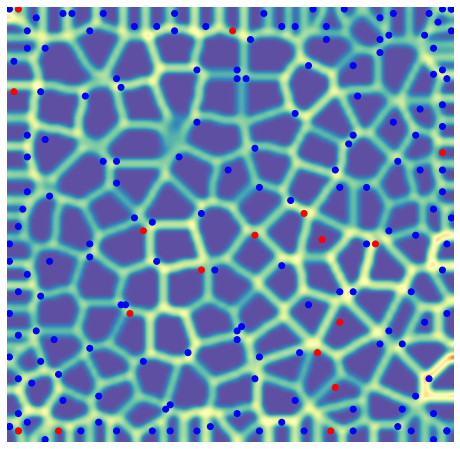

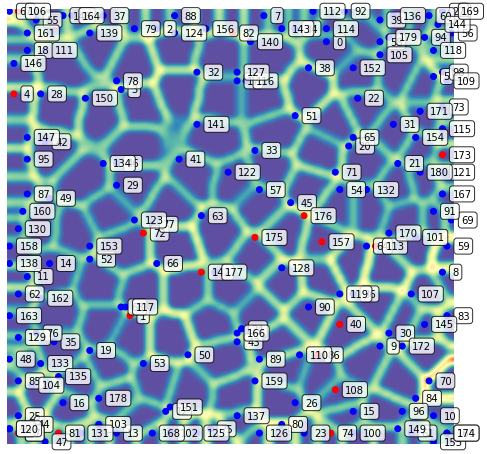

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [212]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)


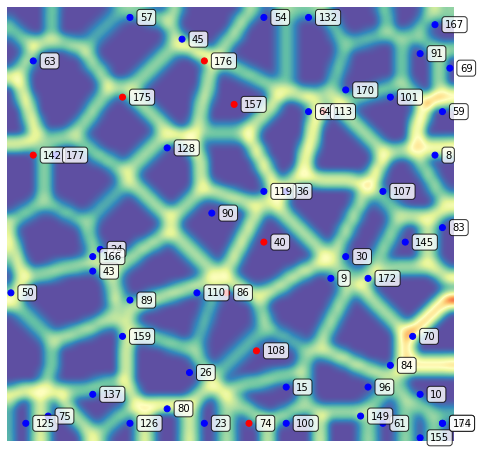

this is the mapping for review: 86
Only two hot chocolate brands for the Tassimo and unfortunately neither one is made with real sugar.  Milka has the artificial (Sucralose) and the Suchards has HFCS.  The Milka is pretty bland with very little chocolate flavor, while the Suchards is decent.  Although, I prefer having milk in my hot chocolate, I will stay with Suchards until hopefully something better comes on the market.  I will use the rest of my Milka for Mocha Capuccinos and leave this one for the "Hot Chocolate Snobs".
this is the mapping for review: 110
If you like chocolate you'll love Koeze's. Their chocolate is flavorful and rich whether it's the dark or milk chocolate. These candies deserve to be called gourmet as they're several cuts above others we've tasted.<br /><br />Our favorites are the Chocolate Pecan Puddles (called "turtles" by some manufacturers). The caramel is buttery while the nuts are large and taste fresh. Our household's likes are evenly divided between dark 

In [247]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels,
                 zoom=((40, n_rows), (40, n_columns)))

#see two clost positive points
pts_1=[86,110]
compare(pts_1,original_data)

In [10]:
pts_1=[24,43,166]
compare(pts_1,original_data)

this is the mapping for review: 24
these scones are absolutely fantastic. i have been looking for a great alternative to starbucks scones for a while and this is it.  first off, i used 4 tbsp of whipped smart balance instead of butter and a tablespoon of soy creamer instead of milk.  this worked well, but just a warning: these scones are slightly savory/salty due to the black pepper and sea salt in the mix.  I found the finished product to be a tad salty (i think the smart balance added salt) so before baking a second time i sprinkled A LOT of turbinado sugar all over the top- problem solved. if you use regular, unsalted butter this may not be as much of an issue.<br /><br />i know that using cubed chilled butter is crucial in regular scones, but here, i found that allowing the smart balance/butter to warm up a bit first helped keep the scones moist while baking.  instead of cutting the butter in with a knife, i threw the cubes in there and made crumbs with my hands. using my hands war